<a href="https://colab.research.google.com/github/mcgoughlin/Python4ML/blob/main/session3/tutorial/MLWorkshop_Session3_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Tutorial: Preprocessing and Data Augmentation, Neural Networks, and Evaluating ROC

Welcome to your third and final coding tutorial! 

In this tutorial, you will learn the final components of developing a neural network model. We will run through the importance of preprocessing, the architecture of the neural network, and we will end on how to evaluate the accuracy of neural networks with accuracy metrics used in peer-reviewed papers.

***BEFORE STARTING***: There are a couple of things you need to do before going through this notebook. Don't fear, both should be easy! Getting them out of the way now allows the changes to be processed as you read and go through the notes below:)

**Tasks:**

1. **Convert Notebook hardware accelerator to GPU**. This isn't strictly necessary - you can run all code in this tutorial without this step - ***but it will save you hours of waiting for code to finish***. Activating a GPU is done simply in Google Colab; simply go to the toolbar in the top-left, go to 'Edit'->'Notebook settings', select 'GPU' from the drop-down menu and click save. Accept any warning that pop up as a result.

2. **Upload the MRI dataset to this Google Colab file system**. Find the dataset at [GitHub](https://github.com/mcgoughlin/Python4ML/tree/main/week3/tutorial/sample_data) or [Google Drive](https://drive.google.com/drive/folders/1PtciejbGvqMhqkgbam329AWrTvCPutzJ?usp=sharing), and copy the 'Brain_tumor_images' .zip file (and cat.jpg image) into this colab notebook's file system under 'sample_data'. The code to unzip this .zip file will be provided later in the tutorial.


# Outline
- [ 1 - Preprocessing](#1)
  - [ 1.1 - Normalisation](#1.1)
    - Exercise
  - [ 1.2 - Data Augmentation](#1.2)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Simplest Case - One Hidden Layer](#2.1)
  - [ 2.2 Deep Neural Networks](#2.2)
  - [ 2.3 Pretrained and Fine-Tuned Neural Networks](#2.3)
    - Exercise
- [ 3 - Evaluating Accuracy](#3)
  - [ 3.1 Final Exercise](#3.1)
  - [ 3.2 Receiver Operating Characteristic](#3.2)


<a name="1"></a>
## 1 - Preprocessing
<a name="1.1"></a>
### 1.1 Normalisation

### The Guassian Distribution

The gaussian distribution, sometimes called the 'bell curve' or the 'Normal Distribution', is one of the most commonly observed distributions of random data. It describes how high-probability outcomes tend to cluster around the centre of a distribution of data, with outliers becoming increasingly improbable the further they stray from the centre.

The gaussian distribution is a symmetrical probability density function defined by two values: the mean and standard deviation, which is usually written as sigma, $\sigma$. The mean value is, as you may have guessed, the average value of the distribution - the standard deviation is the average absolute distance from the mean in the dsitribution. In other words, the mean dictates the centre of the distribution, and the standard deviation dictates how *spread out* the distribution is. A low standard deviation will generate a thin and pointy distribution, and a high standard deviation will generate a fat and flat distribution. **See an example of a Gaussian Distribution below**.

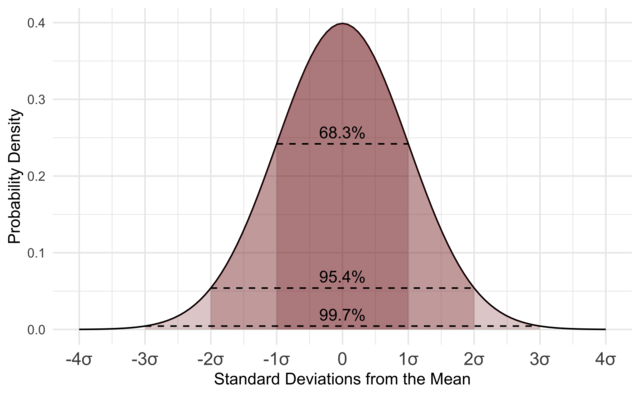

When we refer to a "Normal" distribution, we refer to a specific case of the Gaussian Distribution with a mean of 0 and a standard deviation of 1. Any Gaussian distribution can be converted into a normal distribution - can be normalised - using the two metrics that define each; mean and standard deviation. Gaussian distributions are normalised using the following equation, where $N(x)$ is the normal distribution, $g(x)$ is any Gaussian distribution, $\overline{g(x)}$ is the mean of $g(x)$, and $\sigma_g$ is the standard deviation of $g(x)$:

\begin{align}
N(x) &= \frac{g(x) - \overline{g(x)}}{\sigma_g} \tag{1}
\end{align}

In words, this means:

1. We subtract the mean of the gaussian distribution from all points on the distribution. This aligns the distribution's new centre with 0.
2. We divide each point by the distributions average distance to the mean. This sets the average distance of all points to the mean to 1.

Hence, our Gaussian becomes the special case of the Normal distribution, with a mean of 0 and a standard deviation of 1.

### Normalising Data

In machine learning, normalising input data is essential as it ensures the reliability of the machine learning process. The essential assumption of normalisation as a preprocessing step is that our input_data adheres to a Gaussian distribution.

Recall in Workshop 1; we said that we must give our model some initiated values of $m$ and $C$ in linear regression before learning begins. These are generally small values, between $-0.5< m, C < 0.5$. Similarly, we had to make some heuristics-led guesses of learning parameters like learning rate, batch size, and epochs. These parameters are unitless, so their absolute magnitude matters - learning can quickly diverge with inappropriately high learning parameter values, or be far too slow if they are inappropriately low.

Similarly, the rate of learning is dicated by the magnitude of our input data. In the case where the mean value of our data's mean output $\overline{Y}$ is >$1$x$10^{4}$, an initial guess $m, C$ of ~0.5 and a learning rate of 0.01 is likely to be inappropriate. Without normalising our input data, we would need to find the correct value of all the learning parameters in a trial-and-error fashion to match our specific dataset's statistics - this is highly inefficient and unreliable in practise. Instead, if we normalise our input data beforehand, we can be sure that our learning parameters are roughly correct, which massively improves the consistency and effiency of our ML analyses.

### Normalisation in Code

In the last tutorial, I asked you to write a function that returned the modal value of a set of column data. In this tutorial, I am going to ask you to normalise each column in the same dataset! Feel free to refer to your code in the last tutorial for help. I will convert the species column into numbers like last time, to allow this column to be manipulated in numbers.

After normalising each column, print the new column's mean and standard deviation, to ensure its normality.

First, let us generate the dataset and convert species to numeric values: 

In [ ]:
import seaborn as sns
our_dataset = sns.load_dataset('iris').reset_index(drop=True) # loads the dataset from python module seaborn - included this code again for completeness

all_species = our_dataset['species'].unique() ## creates a list of all the species listed in our dataset
print(all_species)

conversion_dictionary = {} # creates an empty dictionary
index = 1
for id in all_species: ## loops over each species, create a dictionary entry with each species id and species id index value starting at 1
  conversion_dictionary[id] = index
  index = index+1 ## increase species id index value after every iterations

print(conversion_dictionary,"\n")

our_dataset['species'] = [conversion_dictionary[id] for id in our_dataset['species'].values] # convert the dataframe's species names to numbers
print(our_dataset.sample(5))

Next, normalisation! Assume each column's data follows a gaussian distribution, and apply equation (1) to convert each column into a normal distribution. I will perform this task on a single column, and plot the results, to help you:


In [ ]:
column_names = our_dataset.columns # generate a list of column names

### Normalising a single column from our_dataset

single_column_name = column_names[0] #this function selects the first column name in the list - you will loop through all the column names
single_column_data = our_dataset[single_column_name].copy() # select the column of data corresponding to our chosen column name
mean = single_column_data.mean() # calculate mean
stdev = single_column_data.std() # calculate stdev
print("Column {} has a mean of {:.2f} and a standard deviation of {:.2f}.".format(single_column_name, mean, stdev))

normalised = (single_column_data.copy() - mean) / stdev # normalise the data!
our_dataset[single_column_name] = normalised  # reassign normalised data in the place of our_dataset
n_mean = normalised.mean() # calculate mean of our new normalised data!
n_stdev = normalised.std() # calculate stdev of our new normalised  data!
print("Normalised column {} has a mean of {:.2f} and a standard deviation of {:.2f}.\n".format(single_column_name, n_mean, n_stdev))


### Plot data distribution of first column before and after - DO NOT INCLUDE THIS IN YOUR FOR-LOOP CODE! This isn't necessary in our exercise :)
import matplotlib.pyplot as plt

plt.hist(single_column_data, 20, alpha=0.5, label='Original Column Data')
plt.hist(normalised, 20, alpha=0.5, label='Normalised Column Data')
plt.legend(loc='upper right')
plt.title("Normalisation of the column {}".format(single_column_name))
plt.xlabel("{} / cm".format(single_column_name))
plt.ylabel("Count")
plt.show()


### Reset data values
our_dataset[single_column_name] = single_column_data ## here I reset the value of the old data so that you don't get a free normalised column. Muahahahah


### WRITE YOUR CODE HERE

for single_column_name in column_names:
  ...


print(our_dataset.head())

<a name="1.2"></a>
### 1.2 Data Augmentation

Generally, when we develop machine learning classifiers, our goal is to have our model perform with a high generalised accuracy on new unseen data. However, when our model encounters new data with different properties to it's training data, the model can perform unreliably and fail. This problem can be thought of as a data collection and preparation problem - had we collected and prepared data for our machine learning model that had every possible variation that we could expect our model to see, then our model couldn't be 'surprised' by a new variation in model properties when evaluating new data.

Clearly, collecting every possible variation of data is impractical. In fact, the very purpose of machine learning is to intelligently learn from a limited supply of data and generalise to new problems, so this mode of data collection defeats the purpose of machine learning. To make the most of our limited data we supply, we can introduce transformations to our data that communicate 'acceptable variations' in our data with a limited training data supply. The introduction of 'acceptable variations' of input data is known as data augmentation, and it is most-intuitively communicate using images.

### Image Data

Take the example of a picture of a cat. Please upload the image of the cat to this tutorial's file system, to the 'sample_data' folder. Let's load this picture in code - for this, we will use the image manipulation package **skimage**:

In [ ]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import torch

fig = plt.figure(figsize=(8,8))
im = io.imread("sample_data/cat.jpg")
plt.imshow(im)
plt.axis(False)

print(im.shape, im.mean(), im.std(), type(im),"\n")

The image is loaded in as a set of integer pixel values stored in a 2D array. This means that every pixel we see in an image corresponds to a single element in a 2D array/ In fact, above our image of the cat, we can see printed values relating the statistical distribution of image's pixel values, including the mean and standard deviation of the pixel values. 

The image array has the shape 2304 x 1728 x 3, which means our image is 2304 pixels tall and 1728 pixels wide, with three pixel values located in each position relating to the RGB (Red, Green, Blue) channel values for each pixel. 

The higher the number for each RGB channel in a given pixel, the brighter the colour is in the pixel. Pixel values are given between 0-255 - a pixel with all RGB values at 255 - i.e., $[255, 255, 255]$ - is a perfectly white pixel, and a pixel with all 0 RGB values is perfectly black. $[255, 0, 0]$ corresponds to perfect red, $[0, 255, 0]$ to perfect green, and $[0, 255, 255]$ to perfect blue. There are $255^3 = 16581375$ variations of pixel RGB values in between these absolute values that describe the full human range of visible colour through RGB channel values.

### Data Augmentation in Image Data

Back to the cat - we can add noise to our image and still recognise that the animal in the image. We can add a lot of noise, actually. Let's add random gaussian noise to all RGB channels in proportion to the image's original pixel variability - measured using standard deviation:

In [ ]:
import numpy as np

num_images = 5
std = im.std() # pixel variation, measured in the image array's standard deviation
print("Image pixels have a standard deviation of {:.2f}.".format(std))
noisy_images = [ np.clip(im + np.random.normal(0, i*i*std/2, size = im.shape),0,255).astype(int) for i in range(num_images)] ## here we create a list of noisy images

fig = plt.figure(figsize=(24,24))
for i,image in enumerate(noisy_images):
  plt.subplot(1,num_images,i+1)
  plt.imshow(image)
  plt.title("Gaussian distributed noise\nadded with mean = 0\nand std dev = {:.0f}%\n of pixel value range.".format(100*(i*i*std/2)/std))
  plt.axis(False)

Similarly, we can flip, rotate, and translate our image and still identify the cat in the image:

In [ ]:
rotated = np.rot90(im)
translated = np.roll(im, -500, axis=[0, 1])
flipped = np.flip(im,axis=1)
images = [im,rotated,translated,flipped]
names = ["Orignal","Rotated","Translated","Flipped"]

fig = plt.figure(figsize=(15,15))
for i,(name,image) in enumerate(zip(names,images)):
  plt.subplot(1,len(images),i+1)
  plt.imshow(image)
  plt.title(name)
  plt.axis(False)

With one image, we can communicate many images that clearly show an image of a cat. 

The purpose of this introduction is not to teach you to manipulate image data, though that is a useful skill. The aim is to communicate that data augmentation can *(and should)* be applied to *any data* format in machine learning model development *if, and only if*, you can accurately predict *unimportant variability in input data*. Data augmentation trains our classifier to recognise and ignore unimportant variation in input data and increases the size of the model's effective training dataset, improving the model's ability to detect important signals. All of these qualities improve the model's general performance on unseen data.

The less data that you have in your training dataset, and the greater your understanding of "unimportant variations" - where unimportant is defined as not changing the correct classification of input data; for images, think small translations, noise additions; rotations etc. - the more useful the introduction of data augmentation is to your model development. Data augmentation improves the model's ability to discriminate signal from noise in unseen data, improving the model's accuracy and reduces its likelihood of overfitting - this is a concept that we will cover later in the tutorial.

<a name="2"></a>
## 2 - Neural Networks
<a name="2.1"></a>
### 2.1 Simplest Case - One Hidden Layer

Neural networks are a class of machine learning models that can perform both classification and regression. Conceptually, both of these tasks have been already been outlined in the first two tutorials; in regression, we aim to predict a continuous output, and in classification, we predict a discrete classification.

The important novelty offered by neural networks is their immense predictive power and customisability of their properties. In this tutorial, you will see that we can easily customise our neural networks from being quite accurate and able to train on a single laptop, to being super accurate needing high-performance computer cluster access to run one prediction. Scaling our neural network's performance is a matter of finding the right classification/regression accuracy that justifies the model's cost to run.

To see how this happens, and how to create our own neural networks, let's introduce you to the simplest case of the neural network: the multi-layer perceptron (MLP).

### Multi-Layer Perceptron

The MLP is an extension of the multivariate regression and/or logistic algorithm. In this example, we will explain the MLP as a classification algorithm, but MLPs can be applied to regression, too.

Let us remind ourselves of the network-like structure of the logistic regression algorithm, in a problem with 3 input and 3 output variables:



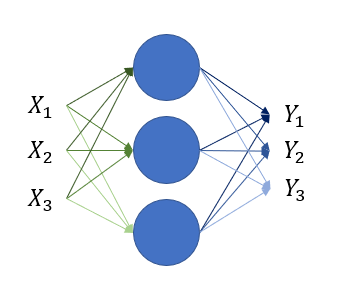

We have dropped the weights and biases from the graphical display for the purposes of clarity. What if we fed the ouput of this logistic regression algorithm into a second logistic regression algorithm, like so:

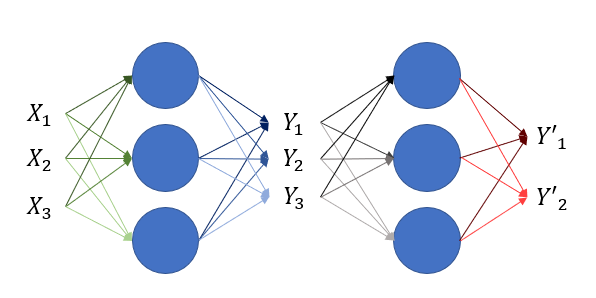

Well, our model still receives three input variables, but now it outputs two final variables, called $Y'_1, Y'_2$ and has a strange intermediary layer of $Y$ variables that correspond to the first logistic regression model's ouput variables. The whole network of nodes acts as a single classifier, that uses 3 inputs variables to predict two output variables. This is a singular MLP model and, when making a prediction, the input data is fed into the first layer as if it were a single logistic regression; this first layer output's the $Y$ variables, which are subsequently fed as inputs to the final layer which could be its own logistic regression model, which then calculates the whole network's outputs, the $Y'$ variables.

In this arrangement, we do not look at the intermediary variable values during training - we only look at the input and output data. Because we do not look at the intermediary layer's variable values, we this layer a 'hidden' layer. This is an example of the simplest possible neural network - an MLP with a single hidden layer.

Well, how does our MLP learn with this strange hidden layer arrangement? The process is still entirely dependent upon gradient descent using a loss function, but there is an extra layer of conceptual abstraction introduced by the hidden layer. Here is the process, in steps:

1. We make initial small guesses of weights and biases across all layers in the network.
2. We normalise our input data, and feed a batch into our neural network model.
3. We look at the model's output and calculate a loss in comparison to the batch's correct labels.
4. We perform gradient descent on the *final layer only*. In this arrangement, we treat $Y_1, Y_2,$ and $Y_3$ as the input variables to a logistic regression problem, treating the final layer as a logistic regression model, and calculate the weight changes between it and $Y'_1, Y'_2$.
5. We work back through the layers of the neural network, training each layer similarly to a singular logistic regression model, using the following layer's corrected outputs as labels and previous layer's output as the input data.
6. Repeat 5. until all layer's have been iterated through.

Steps 5. and 6. are known as 'backpropagation', and it is the fantastic algorithm that makes training neural networks possible.

<a name="2.2"></a>
### 2.2 Deep Neural Networks

To understand the purpose of having multiple layers in a neural network, we turn again to an image classification problem.

Remember - images are stored as 2D arrays of numbers. We can therefore treat an image's pixel values as a set of input variables! We will look at the simplified case of black and white images where we dont need colour channels - our pixel values are scalar values between 0-1 that correspond to the greyscale intensity of the pixel. 0 is black, 0.5 is grey, 1 is white. Therefore, our image arrays become two dimensional. In our example, we will look at the MNIST dataset, that contains 28x28 greyscale images of handwritten digits. 

**Run the code below to load this dataset**. 

> **Note:** DO NOT WORRY ABOUT THE MEANING OF THIS CODE! We are using an advanced PyTorch concept - the DataLoader - which works in a functionally identical manner to two zipped lists of input data and labels. To learn more  about PyTorch DataLoaders, read [this tutorial](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel).

In [ ]:
import torch, torchvision

batch_size_train = 64
batch_size_test = 64

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                             torchvision.transforms.Lambda(lambda x: torch.flatten(x))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                             torchvision.transforms.Lambda(lambda x: torch.flatten(x))
                             ])),
  batch_size=batch_size_test, shuffle=True)

With the handwritten digit dataset loaded in the two dataloaders above, run the code below repeatedly to see different examples of images in the dataset!

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
print(images.shape)
im, lab = images[0],labels[0]

plt.imshow(im.numpy().reshape(28,28))
plt.axis(False)
print("The label for this number is {}.".format(lab))

### MLP versus Logistic Regression

The problem of classifying the the pictures of numbers above into discrete digits between 0-9 is framed as a classification problem with $28$x$28=784$ input variables and $10$ output variables.

A plane-jane logistic regression model with no hidden layers is essentially charged with learning how each specific pixels correlate with each discrete output class. As there is great variability in the location and handwriting style for all digits, the logistic regression model will struggle to find any signal in this arrangement.

This learning paradigm changes when logistic regression algorithms are stacked on top of each other. Now, instead of having to directly correlate specific pixels to specific digits, each logistic regression model that constitutes the MLP can learn abstracted intermediary patterns that can aid classification. For example, the first layer can learn to detect *edges* in the input image, as edges are simply localised regions of high-intensity pixels neighbouring low-intensity pixels. This can help in the 1-hidden-layer example, as it is easier to understand how *edges* might correlate with output digits.

### What if we add more layers?

If we abstract further, and add more hidden layers, our neural network can learn to detect more abstract patterns. In the 2-hidden-layer neural network, instead of having to correlate edges to output classes, the neural network can use the $1^{st}$ hidden layer's *edges* to detect *shapes* in the $2^{nd}$ hidden layer. Digit classification in the final layer becomes even easier with shape information from the second hidden layer. 

Adding further layers, increasing the depth of the neural network, increases it's accuracy as more layers allows the model to identify increasingly abstract signals in input data. However, increasing network depth has a diminishing return on accuracy, and it incurs a linear cost increase for predictions. 

> **Note:** For the record, increasing the network width (number of nodes per layer) also increases the network's accuracy. However, a wide network and deep network are not equivalent; a discussion on this is out of this course's scope, but if you are interest in this idea, you can read [this blog](https://ai.googleblog.com/2021/05/do-wide-and-deep-networks-learn-same.html).

### Testing the theory

Let's see how accuracy varies with network depth by training a single layer neural network (MLP), a 1-, 3-, and 5-hidden-layer neural network in the code below:

**This training should take roughly 5 minutes, providing that you have connected this notebook to Google Colab's GPU facilities. Training will be much longer, otherwise.**

>**Note:** We append the function '**.cuda()**' to the models, all layer-changes made in the models, the loss function, and the input labelled data. This functions sends these data structures to be stored in the GPU for fast processing! Don't forget to add these to your versions of these structures in later exercises.


>**Second Note:** We use the 'squashing' function **ReLU** in all hidden layers for our multi-layer MLPs. A discussion on why we do this is out of the scope of this course, but if you are interested, please [read here](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/). We still use Sigmoid to squash our model predictions, though!

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Code our models as a set of stacked logistic regression models
LogReg = nn.Sequential( nn.Linear(784, 10), nn.Sigmoid()).cuda()

OneHidLay = nn.Sequential( nn.Linear(784, 128), nn.ReLU(),
                           nn.Linear(128, 10), nn.Sigmoid()).cuda() ### the output of one layer must have an identical size to the input of the next layer

ThreeHidLay= nn.Sequential( nn.Linear(784, 128), nn.ReLU(),
                            *[nn.Linear(128,128), nn.ReLU()]*2,
                            nn.Linear(128, 10), nn.Sigmoid()).cuda()

FiveHidLay = nn.Sequential( nn.Linear(784, 128), nn.ReLU(),
                            *[nn.Linear(128,128), nn.ReLU()]*4,
                            nn.Linear(128, 10), nn.Sigmoid()).cuda()


## define the trainning parameters: loss function and optimizers
optim = torch.optim.SGD
n_epochs = 20
models = [LogReg, OneHidLay, ThreeHidLay, FiveHidLay]
names = ["LogReg","OneHidLay","ThreeHidLay","FiveHidLay","TenHidLay"]
loss_func = nn.MSELoss().cuda() # this is our MSE loss function 
optimisers = [optim(model.parameters(),lr=0.02,momentum=0.9) for model in models] # this is a list of our gradient descent optimiser for each model


losses = []
#this is training!!!
for i in range(n_epochs):
  print("In epoch {}/{}...".format(i+1,n_epochs), sep='', end='', flush=True)
  for x_batch, lab in train_loader: # loop the training code for as many training epochs as we desire
    loss_batch = []
    x_batch = x_batch.cuda()
    lab = lab.cuda()
    for opt,model in zip(optimisers,models):
      opt.zero_grad() #initialise the gradient descent algorithm  
      pred = model(x_batch) # predict the batch outputs using our model
      one_hot = torch.nn.functional.one_hot(lab,num_classes=10).float()    
      loss = loss_func(pred,one_hot) # calculate the loss of our predictions using the labels
      loss.backward() # calculate gradient_descent parameters
      opt.step() # change the model values using the gradient descent parameters
      loss_batch.append(float(loss)) # save the loss value to a list so we can plot the losses later
    losses.append(loss_batch)
  print("\r", sep='', end='', flush=True)

losses = np.array(losses)

fig = plt.figure(figsize=(15,10))
plt.plot(losses,linewidth=0.2) # plot our training losses
leg = plt.legend(names)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(5)

plt.xlabel("Training batches")
plt.ylabel("MSE Training Loss")

The training loss curve above shows some fascinating relationships between the complexity (here, we increase model complexity by increasing model depth) and loss behaviour. Here are some important observations:

1. **The simplest models converge the quickest.**
2. **The most complex models attain the lowest training losses.**
3. **The most complex models have show highly discontinuous relationship between number of training batches and training loss.** At roughly 100 training batches, would would appear like the 3- and 5-layer models have full converged at a loss plateau of roughly 0.09, whereas the simpler logistic regression and 1-layer MLP were still converging towards lower loss values of less than 0.05. This highlights the importance of training *far* past apparent convergence, as at 200 and 2000 training batches, the 3- and 5-layer models respectively go through a loss phase shift with these two models eventually converging to a loss of near-zero.

However, as mentioned in the lecture materials, when training losses fall this low there is a real risk of overfitting. Overfitting happens when a model learns to detect spurious signals that are incidentally highly correlated with labels in the training data but not in reality. This leads to extremely high training performance, with very low training losses, but very poor validation performance in new unseen data that does not contain this spurious signal.

For funny examples of overfitting in practise, I suggest briefly listening to football and political commentators. Political overfitting is exhibited in the comic below, in a "time series model" - a political commentator - attempting to predict the winner of upcoming presidential elections in the USA, made by the brilliant webcomic artist Randall Munroe at [xkcd](https://xkcd.com/1122/):

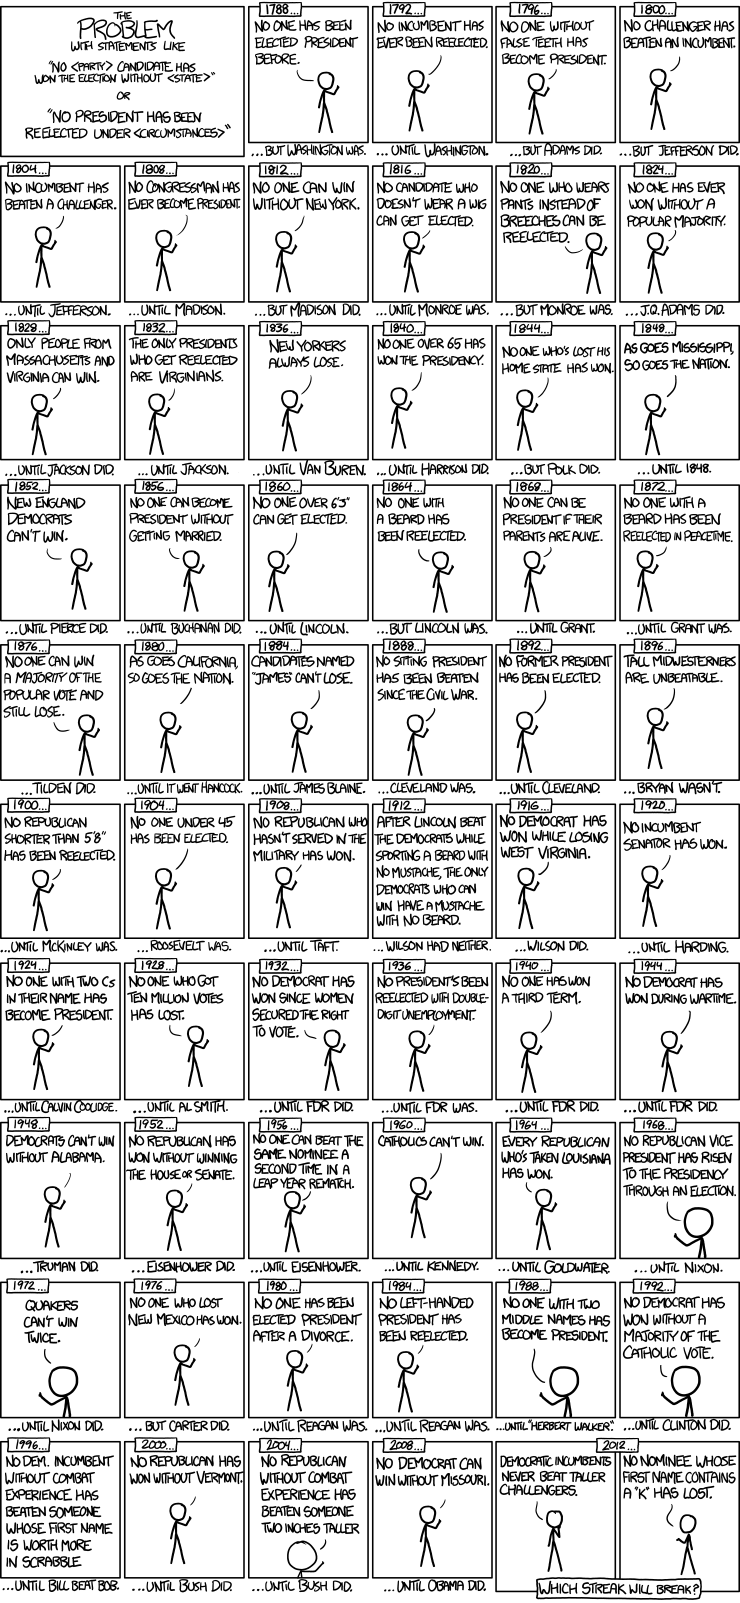

Simply put: overfitting happens when models rely on signals from past / training data that do not help to accurately predict from new / unseen data. The only way to ensure your model has not overfit its training data is to test its accuracy on unseen data.

We do this below; evaluating the model over unseen data in validation:

In [ ]:
accuracy = np.zeros((len(models),2))
#this is training!!!
for x_batch, lab in test_loader: 
  for index,model in enumerate(models):
    opt.zero_grad() #initialise the gradient descent algorithm
    model.eval() 
    pred = model(x_batch.cuda()).cpu() # predict the batch outputs using our model
    p = torch.argmax(pred,axis=1)
    one_hot = torch.nn.functional.one_hot(lab,num_classes=10).float()  
    accuracy[index,0] += (p==lab).sum()
    accuracy[index,1] += (p!=lab).sum()


for i,(name,results) in enumerate(zip(names,accuracy)):
  cor,incor = results
  final_training_loss = losses[-1,i]
  print("Model {} has a validation accuracy of {:.2f}% and a final training loss of {:.3f}.".format(name,100*(cor/(cor+incor)), final_training_loss))

Generally, the deeper our MLP, the higher its validation accuracy. Despite this, most of the time, the 3-hidden layer MLP should have the highest validation accuracy (or joint highest accuracy) of all the models above, despite the 5-layer model having the lowest final training loss. This indicates that the 5-layer MLP has ceased to make significant accuracy gains, and may be beginning to overfit during training. 


<a name="2.3"></a>
### 2.3 Pretrained and Fine-Tuned Neural Networks

In many cases, we can avoid most of the cost of training a neural network by downloading a pretrained model's weights and biases. These models, that have been trained on a specified classification/regression tasks, can be 'transferred' to a new domain, by training it briefly on a new dataset.

In medical image classification, we often download neural networks originally trained on natural images of cats, dogs, and cars, and 'fine-tune' them on a small set of labelled medical images, such as X-rays and CT scans. This massively reduces the cost of training, and the size of the required training dataset.

### Exercise


In the exercise below, you should train the pretrained network 'ResNet' - the most-used pretrained convolutional neural network in medical AI. You will fine-tune this neural network for only 2 epochs on a new dataset of natural images from the 'CIFAR' dataset, and train a randomly-initialised ResNet, and compare the losses and validation accuracies of both networks.

You have been given the models, with all necessary layer changes to accomodate the new dataset. Uses the training code from section 2.2 to training these two new models. Don't forget to add .cuda() to all of your models, loss function, and labelled data!

**The training below should take roughly 2 minutes per epoch.**

> **Note:** It is important to point out that ResNet is an instance of a special type of neural network, the convolutional neural network (CNN). Learning about the differences between the MLP and CNN is beyond this course's scope, but they are very similar, and you can learn all you need to know about the differences between MLPs and CNNs in these genuinely brilliant short videos:
1. [Explaining the convolution.](https://www.youtube.com/watch?v=C_zFhWdM4ic)
2. [Explaining the difference between the MLP and CNN.](https://www.youtube.com/watch?v=py5byOOHZM8&t=692s)

In [ ]:
import torch, torchvision
from torchvision import transforms, models

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2,pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2,pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### pretrained on a different dataset - ImageNet
ResNet_pt = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1).cuda()
ResNet_pt.fc = nn.Linear(512,10).cuda()
### Random initial weights - ResNet with no initial training
ResNet_rand = models.resnet34(weights=None).cuda()
ResNet_rand.fc = nn.Linear(512,10).cuda()


### Fill in the correct training parameters here! - I suggested your number of epochs should be 2...


### THIS IS TRAINING
losses = []
for i in range(n_epochs):
  print("In epoch {}/{}...".format(i+1,n_epochs), sep='', end='', flush=True)
  for x_batch, lab in trainloader: # loop the training code for as many training epochs as we desire
    loss_batch = []
    for opt,model in zip(opts, models):
      x_batch = x_batch.cuda()
      lab = lab.cuda()

      ### WRITE YOUR CODE HERE
      ......

      ## DO NOT CHANGE UNDER THIS LINE

      loss_batch.append(loss.item())
    losses.append(loss_batch)
  print("\r", sep='', end='', flush=True)

losses = np.array(losses)

plt.plot(losses)
plt.legend(model_names)
plt.show()

If you have successfully trained the randomly initialised model and pretrained model, you will see that the pretrained model converges sooner than the randomly initialised model. You will also see that the pretrained model achieves a lower final training loss than the randomly initialised model. **The only difference between these models is their initial weights! They are otherwise identical neural networks; using pretrained weights significantly improves the performance of your neural network model.**

Run the code below to evaluate the accuracy of the each model. You should see sub-par performances from both models (\<80%) - bear in mind, the model has to choose one class from 10, so random guessing would equate to roughly 10% validation accuracy. You should also see that the pretrained model has vastly superior validation performance than the randomly initialised model.

If all the code above, and the validation code below, ran smoothly, try running the training and validation code again after increasing the learning rate and number of epochs, to see their effect on training losses and validation performance!

In [ ]:
accuracy = np.zeros((len(models),2))
#this is training!!!
for x_batch, lab in testloader: 
  for index,model in enumerate(models):
    opt.zero_grad() #initialise the gradient descent algorithm
    model.eval() 
    pred = model(x_batch.cuda()).cpu() # predict the batch outputs using our model
    p = torch.argmax(pred,axis=1)
    one_hot = torch.nn.functional.one_hot(lab,num_classes=10).float()  
    accuracy[index,0] += (p==lab).sum()
    accuracy[index,1] += (p!=lab).sum()
    
losses = np.array(losses)

for i,(name,results) in enumerate(zip(model_names,accuracy)):
  cor,incor = results
  final_training_loss = losses[-1,i]
  print("Model {} has a validation accuracy of {:.2f}% and a final training loss of {:.3f}.".format(name,100*(cor/(cor+incor)), final_training_loss))

<a name="3"></a>
## 3 - Evaluating Performance

#### Sensitivity and Specificity

As you saw in the last tutorial, we typically use sensitivity and specificity for evaluating the performance of classification models in binary 2-class classification problems. However, when we extend our classification problem beyond 2 classes, evaluating performance can become tough. In this tutorial, we have opted for accuracy - we compare the model's highest-confidence classification to the correct label and call it correct if they match, and incorrect if they are wrong, and we find accuracy as the percentage of correct guesses vs total guesses.

Using this metric to evaluate performance sounds sensible, but it is simplistic - how does the model perform in each specific class? For example, our model might be a fantastic cat-spotter, but terrible at differentiating a dog and a horse, and this information would be lost using a simplistic metric of performance. This problem seems trivial in our low-stakes example, but differentiating specific classes in medicine, such as between a cyst and a tumour in a CT scan, is of *vital* importance to the patient.

Well, rather than simply counting the correct and incorrect classifications made by our model, we can count the class-wise true postives, true negatives, false positives, and false negatives, and finally evaluate each model's class-wise sensitivity and specificity. We do this by treating each prediction as its own binary 2-class problem. 

For example, if our model correctly classifies an image of a dog, then that prediction is a true positive for the 'dog' class, and a true negative for all other classes simultaneously, as our model only produced the 'dog' prediction. If our model provides an incorrect classification of the dog image (let's say, the model thought the dog was a horse), the model receives a false negative in the dog class, a false positive in the horse class, and a true negative in all the other classes, as the model still correctly identified that the horse was not anything else but a dog.

Let's see how this plays out in code, using the test data we generated in the previous example:

In [ ]:
classwise_accuracy = np.zeros((len(classes),len(models),4))
#tp, tn, fp, fn

for x_batch, lab in testloader: 
  for index,model in enumerate(models):
    opt.zero_grad() #initialise the gradient descent algorithm
    model.eval() 
    pred = model(x_batch.cuda()).cpu() # predict the batch outputs using our model
    p = torch.argmax(pred,axis=1)
    correct = p==lab

    for prediction,ans,true in zip(p,lab,correct):
      if true:
        classwise_accuracy[ans,index,0]+=1
        classwise_accuracy[:,index,1]+=1
        classwise_accuracy[ans,index,1]-=1 # if correct ans = pred, so only need to remove 1 tn
      else:
        classwise_accuracy[p,index,2]+=1 # add 1 to fp for prediction
        classwise_accuracy[ans,index,3]+=1 # add 1 to fn for real answer
        classwise_accuracy[:,index,1]+=1 # all classes add true negative
        classwise_accuracy[ans,index,1]-=1 # take tn away from ans and pred classes
        classwise_accuracy[p,index,1]-=1

cw_sens = np.divide(classwise_accuracy[:,:,0], classwise_accuracy[:,:,0] +classwise_accuracy[:,:,3])
cw_spec = np.divide(classwise_accuracy[:,:,1], classwise_accuracy[:,:,1] +classwise_accuracy[:,:,2])

for class_name, sens,spec in zip(classes,cw_sens,cw_spec):
  pt_spec,ri_spec = spec
  pt_sens,ri_sens = sens

  args = [class_name,pt_sens*100,pt_spec*100,100*ri_sens,100*ri_spec]

  print("For class \"{}\", pretrained model achieved {:.2f}% and {:.2f}% sensitivity and specificity\nand randomly initialised model achieved {:.2f}% and {:.2f}% sensitivity and specificity.\n".format(*args))

The result of the above code block is quite random, and hard to predict. In my case, my pretrained model has become a savant frog-spotter, with 82% sensitivity! But my randomly initialised model seems nearly incapable of spotting a cat, with 6.8% sensitivity... nobody tell Hannah Clayton.

Calculating class-wise performance metrics, such as sensitivity, specificity, Dice Similarity, PPV, NPV... etc., is about as good as we usually wish to do for multi-class classification models. Communicating more sophisticated performance metrics is definitely possible, though much more difficult. To explore the performance metrics that go beyond sensitivity and specificity, we must return to the binary classification problem.

<a name="3.1"></a>
### 3.1 Final Exercise

For this final exercise, we introduce a new dataset; a publicly available dataset of MRI scan slices containing some patients with brain cancer and some without, taken from [Kaggle](https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images). Uploading/downloading this dataset may take a while... so hopefully you completed this at the start of the tutorial as you were told! Just kidding, I don't mind. Still though, I did say. Here are the the instructions for uploading the required dataset to this notebook:

>Find the dataset at [GitHub](https://github.com/mcgoughlin/Python4ML/tree/main/week3/tutorial/sample_data) or [Google Drive](https://drive.google.com/drive/folders/1PtciejbGvqMhqkgbam329AWrTvCPutzJ?usp=sharing), and copy the 'Brain_tumor_images' .zip file into this colab notebook's file system under 'sample_data'.

Let's load the dataset...

**Do not change this code! Just run it, the exercise is later.**



In [ ]:
directory = 'sample_data/Brain_tumor_images.zip'

import zipfile
with zipfile.ZipFile(directory, 'r') as zip_ref:
    zip_ref.extractall('sample_data')

import torch, torchvision
from torchvision import transforms

BATCH_SIZE = 50
EPOCHS = 20
IMAGE_SIZE = (200, 200)

#Here, we create a custom dataset from our unzipped file structure
#We add a set of transforms - data augmentations! - to improve training over this small dataset of images (~200 images)
#Read through the transforms applied in the dataset below in the PyTorch documentation: https://pytorch.org/vision/stable/transforms.html
full_dataset = torchvision.datasets.ImageFolder(directory[:-4],
                                                 transforms.Compose([
                                                     transforms.RandomHorizontalFlip(p=0.5),
                                                     transforms.RandomVerticalFlip(p=0.5),
                                                     transforms.RandomRotation(degrees=180),
                                                     torchvision.transforms.RandomAffine(20,(0.1,0.1)),
                                                     transforms.RandomApply([transforms.GaussianBlur(kernel_size=11)],p=0.2),
                                                     torchvision.transforms.RandomResizedCrop(200,scale=[0.8,1.0]),
                                                     torchvision.transforms.ToTensor(),
                                                     torchvision.transforms.Normalize(0.4,0.2),
                                                     torchvision.transforms.Grayscale()])) 

### Here, we split our dataset between train and test with and 80:20 split
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=BATCH_SIZE, shuffle=True)

import matplotlib.pyplot as plt

a,b = next(iter(train_loader))

im = a[0,0].numpy()

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(im)
plt.axis(False)
print("Random sample image has a label of {}".format(b[0]))
                                                 

Now, let's get training some models!

Again, we are going to train a pretrained and randomly initialised ResNet. Use the previous training codes in this tutorial to guide your coding!

**Enter the training code below to train our models with our custom dataset!**

In [ ]:
from torchvision import models
import torch.nn as nn
import torch
### pretrained on a different dataset - ImageNet
ResNet_pt = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1).cuda()
ResNet_pt.fc = nn.Linear(512,10).cuda()
ResNet_pt.conv1 = nn.Conv2d(1,64,7,2,3).cuda()
### Random initial weights - ResNet with no initial training
ResNet_rand = models.resnet34(weights=None).cuda()
ResNet_rand.fc = nn.Linear(512,10).cuda()
ResNet_rand.conv1 = nn.Conv2d(1,64,7,2,3).cuda()

n_epochs = 50
### WRITE THE TRAINING CODE HERE!

...

losses = np.array(losses)

plt.plot(losses)
plt.legend(model_names)
plt.show()

If you have trainedy our model correctly, the above code block should produce two loss curves, with the pretrained model finishing with a lower loss than the randomly initialised model.

**The key question that you must answer here is: does this translate to a higher validation accuracy, or has my model overfit the training data?**

To answer this question, we began an advanced form of validation: evaluating each models Receiver Operating characteristic.

<a name="3.2"></a>
### 3.2 Receiver Operating Characteristic

In the previous tutorial, we stated that sensitivity and specificity were useful metrics for evaluating model accuracy on unseen data. This is true, but we used a sneaky crutch that simplifed our explanation - a decision boundary.

We stated that any binary prediction <=0.5 was positive, and anything >05 was negative. This may make sense, but it eliminates any grey-area associated with unsure guessing, and the trade-off between specificity and sensitivity that may be possible in our model.

This is where the Receiver Operating characteristic (ROC) comes in. By varying that decision boundary between 0-1, we can see how the model's specificity and sensitivity changes. When the model has a decision boundary of 0.1, nearly all the models guesses will return positive, leading to a super sensitive, yet potentially unspecific model. Calculating this variation in sensitivity vs specificity allows us to quantify the model's whollistic performance in validation.

Do this for our model, by running the code below.

First, evaluate the model's predictions:

In [ ]:
import numpy as np
predictions = [[],[]]
answers = []

sigmoid = nn.Sigmoid()

for x_batch, lab in test_loader: 
  answers.extend(lab.detach().cpu().numpy().tolist())
  for index,model in enumerate(models):
    preds = []
    model.eval() 
    pred = model(x_batch.cuda()).cpu() # predict the batch outputs using our model
    predictions[index].extend(sigmoid(pred[:,1]-pred[:,0]).detach().numpy().tolist())

predictions = np.array(predictions)
answers = np.array(answers) 

Second, evaluate how the models specificity and sensitivity changes over a set of decision boundaries, using the stored prediction values and an array of 49 equally-spaced decision boundaries between 0-1:

In [ ]:
number_of_boundaries = 49
decision_boundaries = np.arange(0,1,1/number_of_boundaries)

sens_spec = np.zeros((len(models),len(decision_boundaries),2))

for index,model_results in enumerate(predictions):
  for jdex, db in enumerate(decision_boundaries):
    correct = answers==(model_results>db).astype(int)

    tp = (correct & (answers==1)).sum()
    tn = (correct & (answers==0)).sum()
    fp = ((~correct) & (answers==0)).sum()
    fn = ((~correct) & (answers==1)).sum()

    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    sens_spec[index,jdex,0:2] = [sens,spec]

Now, we can plot the specificity vs sensitivity, to generate the ROC! Finding the area under the curve (AUC) for the ROC gives us the model's AUC - a whollistic measure of accuracy, used in deep learning academic literature to convey a model's accuracy in binary classification problems.

In [ ]:
import matplotlib.pyplot as plt 
pt_sens, pt_spec = sens_spec[0].T
ri_sens, ri_spec = sens_spec[1].T

plt.plot(pt_spec,pt_sens)
plt.plot(ri_spec,ri_sens)
plt.legend(['Pretrained','Randomly Initialised'])
plt.title("Receiver Operating Characteristic of Two ResNet\n models in a Cancer Image Classification Task.")
plt.ylabel("Sensitivity")
plt.xlabel("Specificity")
pt_AUC = np.trapz(pt_sens,pt_spec)
ri_AUC = np.trapz(ri_sens,ri_spec)

print("Pretrained model as an AUC of {:.2f}.".format(pt_AUC))
print("Randomly initialised model as an AUC of {:.2f}.\n".format(ri_AUC))

### Summary

There we go! You have finished the course! CONGRATULATIONS!!

You have learned the fundamentals of ML, and are ready to understand how models are developed in academic papers. Specifically, here are the core topics you have learned:



*   the fundamental components of the ML 'recipe' - a optimisation algorithm (gradient descent), a loss function (MSE loss), a labelled dataset, and a model.
*   how increasing model depth (and width), increases its complexity and ability to model increasingly complex problems, whilst increasing training cost and the probability of overfitting.
*   the importance of data visualisation; to verify the data pipeline you have created, and preprocessing; to increase the reliability and speed of training.
*   how we preprocess and visualise data, using normalisation and matplotlib.
*   how neural networks generate their predictions and learn, and why their accuracy and cost scales with depth.
*    why, and how, we evaluate model accuracy.

Further, you have actually visualised cancer image and numeric data, preprocessed it, trained a model using it, and evaluated the model's accuracy. All examples given in these tutorials have been using real publicly available patient data. Now, if you encounter similar problems in practise, you can always refer to these notebooks to help speed up your analyses!

> **Note:** We would **LOVE** to have your feedback; please leave feedback [here](https://forms.gle/SwzvNMn9RrcQkv9d7). There are only 6 required questions, and they are all multiple choice.

If you want to test these points of learning, I recommend reading [this fantastic paper](https://www.nature.com/articles/s41591-021-01287-9), written by members of our group, that uses ResNet to triage cancer screening in esophageal cancer.

Otherwise, just congratulations, and thank you for engaging with this course. All the best!